In [1]:
import numpy as np
from WLM import *
from f_chain import kappa_eff
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
import pyvista as pv
pv.set_jupyter_backend('none')
from scipy.ndimage import gaussian_filter
from scipy.io import savemat, loadmat

<Figure size 1152x1152 with 0 Axes>

## plotting

In [2]:
data = loadmat("mat/gamma.mat")
gamma_list = data["gamma_list"]

/tmp/ipykernel_2766318/3705918845.py:28: RuntimeWarning: divide by zero encountered in log
  ax.pcolormesh(np.log(gamma_center).T, cmap = "inferno", vmin=0, vmax=np.log(N_backbone))


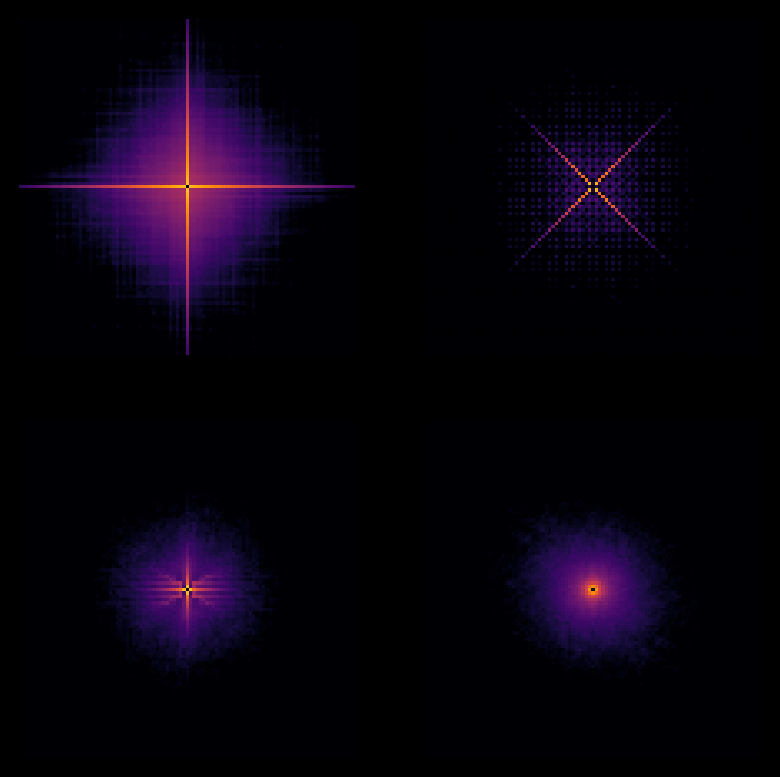

In [3]:
# Degree of polymerization
N_backbone = 1000

# Chain stiffness (placeholder)
a_backbone = 1

# Unit persistence
lambda_backbone = 1

# Call WLChain class
unit_C = np.zeros((3,1))
chain = WLChain(N_backbone,a_backbone,lambda_backbone,unit_C)
chain.apply_SA = 0
chain.d_exc = 0.1
chain.f = 0.0

chain.kappa = 10

box_size = 50

fig = plt.figure(figsize=(5, 5),dpi=192)

for i in range(4):
    gamma = gamma_list[i]
    gamma_center = gamma[:,box_size,:]
    ax = fig.add_subplot(2,2,i+1)
    ax.pcolormesh(np.zeros_like(gamma_center), cmap="gray")
    ax.pcolormesh(np.log(gamma_center).T, cmap = "inferno", vmin=0, vmax=np.log(N_backbone))
    # levels = np.linspace(-12,0,13)
    # ax.contour(qqx*N_backbone,qqy*N_backbone,log_S_q_sm.T, levels=levels, colors='w')
    # ax.set_title(grid,fontsize=18)
    ax.set_xlabel(r'$x$',fontsize=18)
    ax.set_ylabel(r'$y$',fontsize=18)
    # ax.set_xticks([-500,0,500])
    # ax.set_yticks([-500,0,500])
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.set_axis_off()
    ax.set_aspect(1.0)
    fig.patch.set_facecolor('k')

In [4]:
r = np.linspace(-box_size,box_size,2*box_size+1)
r_grid = np.meshgrid(r,r,r)

def plot_isosurface_gamma(gamma, filename):
    # pyvista
    # https://stackoverflow.com/questions/6030098
    grid = pv.StructuredGrid(r_grid[1], r_grid[0], r_grid[2])
    grid["vol"] = gamma.flatten('F')
    mesh_1 = grid.contour([N_backbone/200])
    mesh_2 = grid.contour([N_backbone/2000])

    # Visualization
    pv.set_plot_theme('document')
    pl = pv.Plotter(window_size=[600, 600])
    pl.enable_anti_aliasing('msaa')

    backface_params = dict(color='#36013f',
                                ambient=0.2, diffuse=0.8, specular=0.1, specular_power=10,
                                opacity=0.1
                                )
    pl.add_mesh(mesh_1, show_scalar_bar=False, color='#FFC000',  
                ambient=0.2, diffuse=0.8, specular=0.1, specular_power=10,
                backface_params=backface_params, 
                smooth_shading=True, 
                opacity=1
                )
    pl.add_mesh(mesh_2, show_scalar_bar=False, color='#C0C0C0',  
                ambient=0.2, diffuse=0.8, specular=0.1, specular_power=10,
                backface_params=backface_params, 
                smooth_shading=True, 
                opacity=0.00
                )
    
    mesh_cube = pv.Cube(center=[0.0,0.0,0.0], bounds=[-box_size,box_size,-box_size,box_size,-box_size,box_size])
    pl.add_mesh(mesh_cube, opacity=0)
    
    pl.camera_position = 'yz'
    pl.camera.azimuth = -60.0
    pl.camera.elevation = 24.0
    pl.camera.reset_clipping_range()

    pl.add_bounding_box()
    pl.show(screenshot=filename,jupyter_backend="none")

In [5]:
grid_name_list = ["SC","RD","RT","KP"]
for i, grid_name in enumerate(grid_name_list):
    filename = "./img/iso_"+grid_name+".png"
    gamma_gaussian = gaussian_filter(gamma_list[i], sigma=1.25)
    plot_isosurface_gamma(gamma_gaussian, filename)

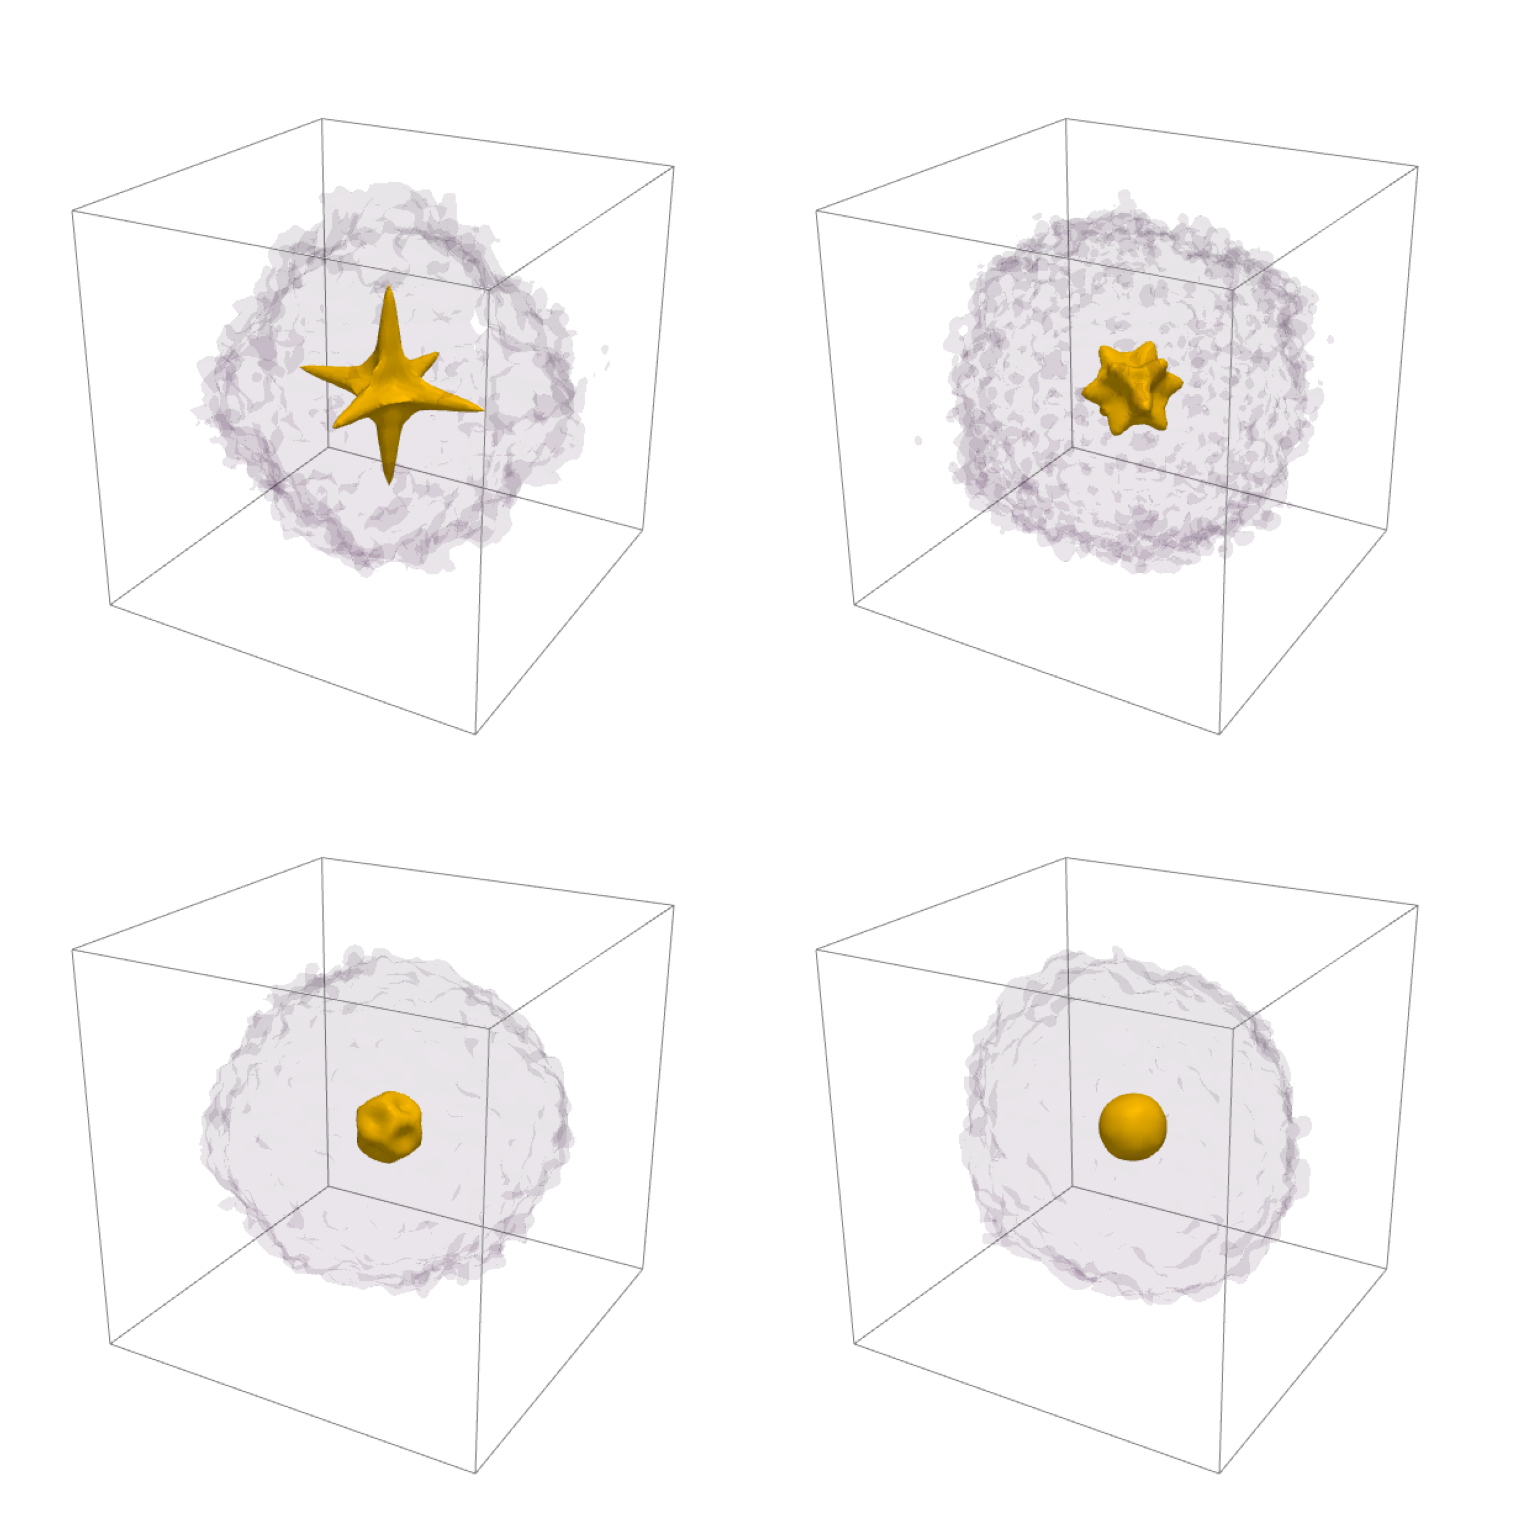

In [6]:
from PIL import Image
fig = plt.figure(figsize=(10,10),dpi=192)
for i, grid_name in enumerate(grid_name_list):
    ax = fig.add_subplot(2,2,i+1)
    # ax.set_title(grid_name, fontsize=20)
    filename = "./img/iso_"+grid_name+".png"
    img = np.asarray(Image.open(filename))
    ax.imshow(img)
    ax.axis('off')
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()  

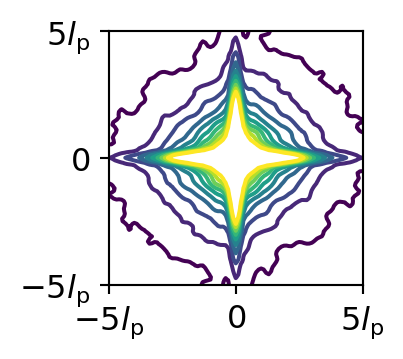

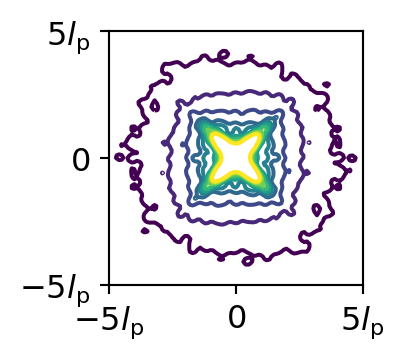

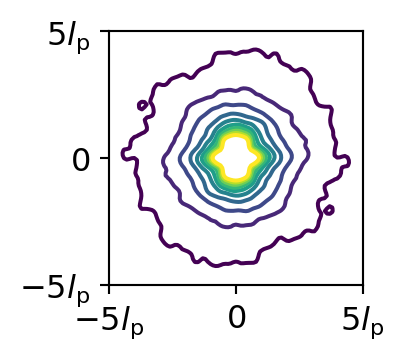

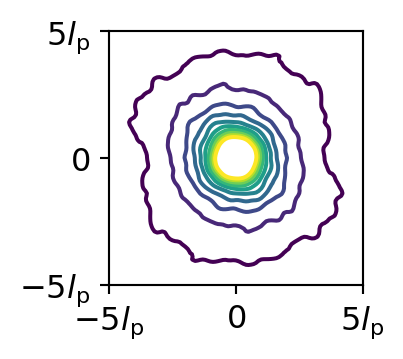

In [7]:
# fig = plt.figure(figsize=(5, 5),dpi=192)
r = np.linspace(-box_size,box_size,2*box_size+1)
r_grid = np.meshgrid(r,r,r)

for i in range(4):
    fig = plt.figure(figsize=(3, 3),dpi=192)
    gamma = gamma_list[i]
    gamma_gaussian = gaussian_filter(gamma_list[i], sigma=1.25)
    gamma_center = gamma_gaussian[:,box_size,:]
    ax = fig.add_subplot(1,1,1)
    levels = N_backbone/2000*np.linspace(1,10,10)
    ax.contour(r_grid[0][:,:,0],r_grid[1][:,:,0],gamma_center, levels)
    
    # ax.pcolormesh(np.zeros_like(gamma_center), cmap="gray")
    # ax.pcolormesh(np.log(gamma_center).T, cmap = "gray", vmin=0, vmax=np.log(N_backbone))
    # levels = np.linspace(-12,0,13)
    # ax.contour(qqx*N_backbone,qqy*N_backbone,log_S_q_sm.T, levels=levels, colors='w')
    # ax.set_title(grid,fontsize=18)
    # ax.set_xlabel(r'$x$',fontsize=18)
    # ax.set_ylabel(r'$y$',fontsize=18)
    ax.set_xticks([-50,0,50])
    ax.set_yticks([-50,0,50])
    ax.set_xticklabels([r"$-5l_\mathrm{p}$",r"$0$",r"$5l_\mathrm{p}$"])
    ax.set_yticklabels([r"$-5l_\mathrm{p}$",r"$0$",r"$5l_\mathrm{p}$"])
    ax.tick_params(axis='both', which='major', labelsize=12)
    # ax.set_axis_off()
    ax.set_aspect(1.0)
    plt.tight_layout(pad=4)
    # fig.patch.set_facecolor('k')